<a href="https://colab.research.google.com/github/adrianols02/DesafioTelecomX_br/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [277]:
import pandas as pd
url = 'https://raw.githubusercontent.com/adrianols02/DesafioTelecomX_br/refs/heads/main/Dados/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [278]:
customer_detalhes = pd.json_normalize(df['customer'])
phone_detalhes = pd.json_normalize(df['phone'])
internet_detalhes = pd.json_normalize(df['internet'])
acount_detalhes = pd.json_normalize(df['account'])

df_normalizado = pd.concat([df, customer_detalhes, phone_detalhes, internet_detalhes, acount_detalhes], axis=1)
df_normalizado.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [279]:
df_normalizado = df_normalizado.drop(['customer', 'phone',	'internet',	'account'], axis = 1)
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [280]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [281]:
df_normalizado.to_csv('clientes_telecomXbr.csv', index = False)

#🔧 Transformação

In [282]:
url_2 = 'https://raw.githubusercontent.com/adrianols02/DesafioTelecomX_br/refs/heads/main/Dados/clientes_telecomXbr.csv'
df_clientes = pd.read_csv(url_2)

In [283]:
df_clientes.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [284]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [285]:
df_clientes.isnull().sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [286]:
# Remove os resgitros com valores nulos
df_clientes = df_clientes.dropna()

In [287]:
df_clientes.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [288]:
# Gera uma lista com os nomes das colunas
colunas = list(df_clientes.columns)
colunas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [289]:
# exibe os valores unicos de cada coluna
for coluna in colunas:
  print(coluna, df_clientes[coluna].unique())

customerID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn ['No' 'Yes']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['Yes' 'No']
tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes' 'No phone service']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['Yes' 'No' 'No internet service']
StreamingTV ['Yes' 'No' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'

In [290]:
import numpy as np

In [291]:
df_clientes['Charges.Monthly'].astype(np.float64)

,Charges.Monthly
0,65.60
1,59.90
2,73.90
3,98.00
4,83.90
...,...
7262,55.15
7263,85.10
7264,50.30
7265,67.85


In [292]:
df_sort_values = df_clientes.sort_values(by = 'Charges.Total', ascending  = True)
df_sort_values.head(15)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
5599,7644-OMVMY,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


In [293]:
#substituindo o valores com ' ' por 0, valor amis apropriado para o Changes.Total cliente com mesmo de um mes de assinatura ('tenure')
df_clientes['Charges.Total'] = df_clientes['Charges.Total'].replace(' ', 0)
df_clientes.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [294]:
sum(df_clientes['Charges.Total'] == 0)

11

In [295]:
#mundando o tipo de dados da coluna Charges.Total
df_clientes['Charges.Total'] = df_clientes['Charges.Total'].astype(np.float64)

In [296]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [297]:
#Substiruindo na coluna SeniorCitizen os valores  0 e 1, onde O = 'No' e 1 = 'Yes'
df_clientes['SeniorCitizen'] = df_clientes['SeniorCitizen'].replace(0, 'No').replace(1 , 'Yes')
df_clientes['SeniorCitizen']

,SeniorCitizen
0,No
1,No
2,No
3,Yes
4,Yes
...,...
7262,No
7263,No
7264,No
7265,No


In [298]:
#lista as colunas com os valor 'No intenert service'
noInternetService = []
for coluna in colunas:
  if 'No internet service' in df_clientes[coluna].unique():
    noInternetService.append(coluna)
noInternetService

['OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [299]:
# substitui o 'No internet service em todas as colunas'
df_clientes[noInternetService] = df_clientes[noInternetService].replace('No internet service', 'No')

In [300]:
sum(df_clientes['StreamingMovies'] == 'No internet service')


0

In [301]:
#substitui o  valor 'No phone service' na colunas Multiplelines
df_clientes['MultipleLines'] = df_clientes['MultipleLines'].replace('No phone service', 'No')

In [302]:
sum(df_clientes['MultipleLines'] == 'No phone service')

0

In [303]:
#criada a colunas Contas_Diarias
df_clientes['Charges.Daily'] = round(df_clientes['Charges.Monthly']/30, 2)


In [304]:
# exibe uma descrição basica do Data frame
df_clientes.describe()


,tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158675
std,24.559481,30.090047,2266.794470,1.003088
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.500000,398.550000,1.180000
50%,29.000000,70.350000,1394.550000,2.340000
75%,55.000000,89.850000,3786.600000,2.990000
max,72.000000,118.750000,8684.800000,3.960000


In [305]:
df_clientes.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [306]:
# excluindo a coluna para uma melhor analise
df_clientes = df_clientes.drop('customerID', axis = 1)


In [307]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

In [308]:
df_clientes.to_csv('clientes_analise.csv', index = False)

#📊 Carga e análise

In [309]:
url_3 = 'https://raw.githubusercontent.com/adrianols02/DesafioTelecomX_br/refs/heads/main/Dados/clientes_analise.csv'
df = pd.read_csv(url_3)
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,No,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7039,Yes,Male,No,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7040,No,Male,No,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7041,No,Male,No,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [310]:
colunas = list(df.columns)
colunas
for coluna in colunas:
  print(coluna, df[coluna].unique())

Churn ['No' 'Yes']
gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['Yes' 'No']
tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['Yes' 'No']
StreamingTV ['Yes' 'No']
StreamingMovies ['No' 'Yes']
Contract ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Monthly [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Charges.Total [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Charges.Daily [2.19 2.   2.46 3.27 2.8  2.31 3.66 2.82 1.61 3.02 1.51 3.89 2.3  3.3

In [311]:
display(df['Churn'].value_counts())
display(df['Churn'].value_counts(normalize = True))

,count
Churn,
No,5174
Yes,1869


,proportion
Churn,
No,0.73463
Yes,0.26537


In [312]:
import plotly.express as px

for coluna in df.columns:
  grafico = px.histogram(df, x=coluna, color='Churn', text_auto= True)
  grafico.show()

In [313]:
# criando um novo Data frame para analizar só clientes que cancelaram
df_cliente_Churn = df[df['Churn'] == 'Yes']
df_cliente_Churn.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80
18,Yes,Male,Yes,No,No,45,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Credit card (automatic),62.7,2791.50,2.09
19,Yes,Male,Yes,No,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.10,0.84


In [314]:
import plotly.express as px

for coluna in df_cliente_Churn:
  grafico1 = px.histogram(df_cliente_Churn, x=coluna, text_auto= True)
  grafico1.show()

#📄Relatorio Final

In [315]:
import plotly.express as px

# Calcula a contagem de cada valor na coluna 'Churn'
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# Cria o gráfico de pizza
fig = px.pie(churn_counts,
             values='Count',
             names='Churn',
             title='Distribuição de Cancelamento de Clientes')

# Exibe o gráfico
fig.show()

In [316]:
correlacao = df.corr(numeric_only=True)

In [317]:
correlacao

,tenure,Charges.Monthly,Charges.Total,Charges.Daily
tenure,1.000000,0.247900,0.826178,0.247910
Charges.Monthly,0.247900,1.000000,0.651174,0.999996
Charges.Total,0.826178,0.651174,1.000000,0.651189
Charges.Daily,0.247910,0.999996,0.651189,1.000000


In [318]:
import pandas as pd
import numpy as np

# Supondo que o DataFrame 'df_transformado' dos passos anteriores é o 'df' sendo usado aqui
# df_transformado foi salvo como 'clientes.csv' e recarregado como 'df'

# Converte colunas categóricas binárias ('Yes'/'No', 'Female'/'Male') para numéricas (1/0)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'SeniorCitizen'] # Adicionado SeniorCitizen
df_corr = df.copy()
for col in binary_cols:
    # Verifica se a coluna está no DataFrame e contém esses valores antes de mapear
    if col in df.columns and df[col].isin(['Yes', 'No']).any():
         df_corr[col] = df[col].map({'Yes': 1, 'No': 0})
    elif col in df.columns and df[col].isin(['Female', 'Male']).any():
         df_corr[col] = df[col].map({'Female': 1, 'Male': 0})


# Agora calcula a matriz de correlação, excluindo colunas não numéricas
# Se você quiser incluir correlações com outras colunas categóricas, você precisaria
# aplicar one-hot encoding a elas antes deste passo.
df_corr.corr(numeric_only=True)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Charges.Daily
Churn,1.000000,0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382,0.191825,0.193356,-0.198324,0.193412
gender,0.008612,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.008414,0.017021,0.013773,0.002105,0.009212,0.008393,0.010487,0.011754,0.014569,0.000080,0.014618
SeniorCitizen,0.150889,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.103006,0.220147
Partner,-0.150448,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.317504,0.096909
Dependents,-0.164221,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.062078,-0.113939
tenure,-0.352229,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.826178,0.247910
PhoneService,0.011942,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113214,0.247361
MultipleLines,0.040102,0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468504,0.490457
OnlineSecurity,-0.171226,0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.411651,0.296591
OnlineBackup,-0.082255,0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509226,0.441762


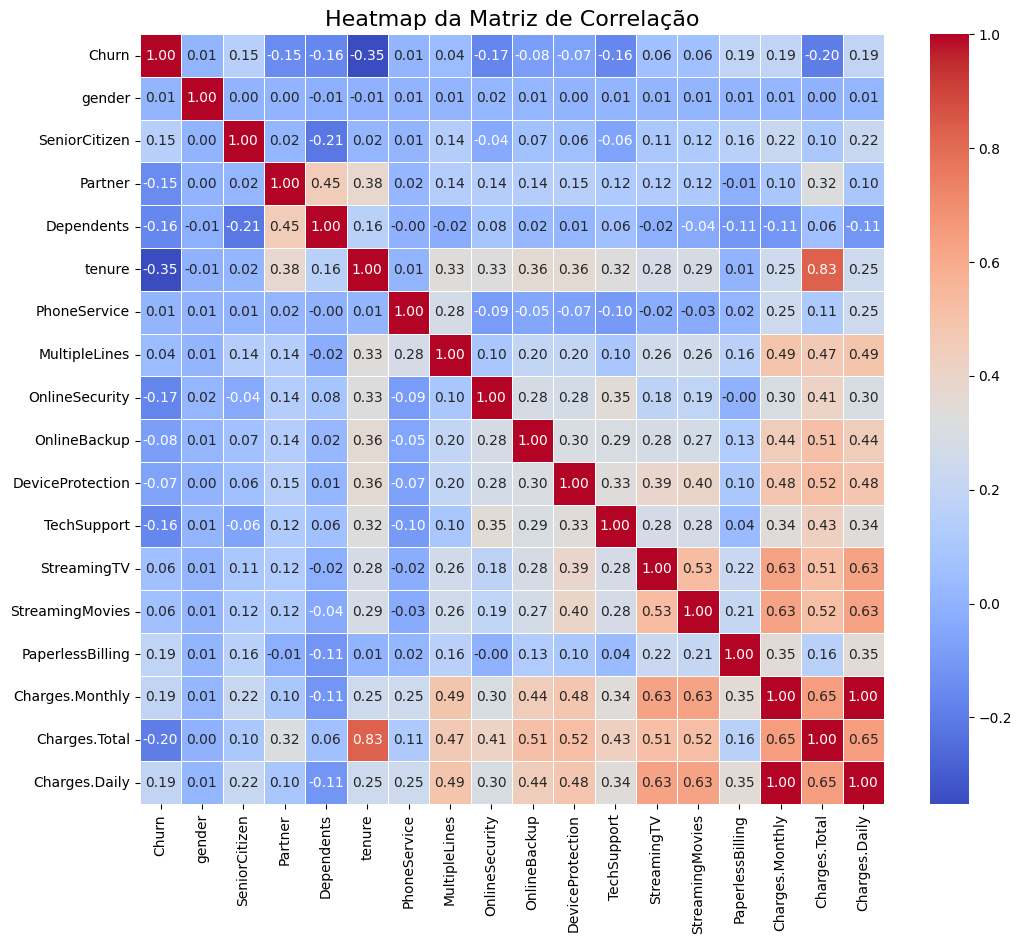

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Inicializa df_corr como um novo DataFrame, copiando o DataFrame original.
df_corr = df.copy()

# Converte colunas categóricas binárias ('Yes'/'No', 'Female'/'Male') para numéricas (1/0)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'SeniorCitizen']

for col in binary_cols:
    if col in df_corr.columns:
        if df_corr[col].isin(['Yes', 'No']).any():
             df_corr[col] = df_corr[col].map({'Yes': 1, 'No': 0})
        elif df_corr[col].isin(['Female', 'Male']).any():
             df_corr[col] = df_corr[col].map({'Female': 1, 'Male': 0})

# Calcula a matriz de correlação numérica
correlacao_numerica = df_corr.corr(numeric_only=True)

# Cria o heatmap da matriz de correlação
plt.figure(figsize=(12, 10)) # Ajuste o tamanho da figura conforme necessário
sns.heatmap(correlacao_numerica, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adiciona título ao gráfico
plt.title('Heatmap da Matriz de Correlação', fontsize=16)

# Exibe o gráfico
plt.show()

# Informações levantadas:

Constatou-se que 26,5% dos clientes cancelaram os seus serviços com a operadora.

## Maior taxa de cancelamento:
### 1. Na modalidade de assinatura mensal;
### 2. Maior taxa de cancelamneto ocorre nos 3 primeiros meses de uso, sendo o primeiro mês com maior numeros de caoncelamento;
### 3. Não utilizavam os serviços digitais extras (Backups, suporte tecnico, Streaming de TV e videos, etc...).

# Relatório de Análise de Cancelamento de Clientes da Operadora
Este relatório detalha as principais informações levantadas a partir da análise da base de dados da operadora, com foco nos padrões e fatores que contribuem para o cancelamento de serviços pelos clientes.

### 1. Taxa Geral de Cancelamento
Foi constatado que 26,5% do total de clientes cancelaram seus serviços com a operadora. Esta é uma métrica crucial que indica uma parcela significativa da base de clientes que não permanece utilizando os serviços, o que pode impactar diretamente a receita e a sustentabilidade do negócio.
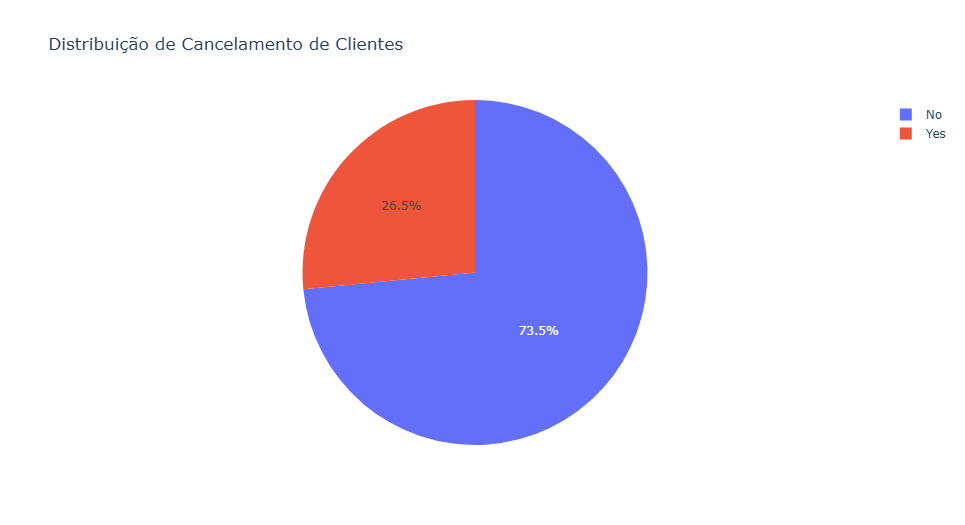

### 2. Modalidade de Assinatura com Maior Taxa de Cancelamento
A análise revelou que a modalidade de assinatura mensal apresenta a maior taxa de cancelamento. Este dado sugere que os clientes com contratos mais flexíveis, que não exigem um compromisso de longo prazo, são mais propensos a encerrar sua relação com a operadora. Isso pode indicar uma menor fidelização ou uma maior sensibilidade a fatores como preço e qualidade do serviço para esse grupo.

### 3. Período Crítico de Cancelamento
Observou-se que a maior taxa de cancelamento ocorre nos três primeiros meses de uso do serviço, sendo o primeiro mês o período com o maior número de cancelamentos. Este é um ponto de atenção crítico, pois indica que a experiência inicial do cliente é determinante para sua permanência. Possíveis causas para esse padrão incluem:

Expectativas não atendidas: O serviço pode não corresponder ao que foi prometido ou esperado pelo cliente.
Problemas na ativação ou instalação: Dificuldades iniciais podem levar à frustração e ao cancelamento precoce.
Falta de engajamento inicial: O cliente pode não se sentir valorizado ou não ser devidamente introduzido aos benefícios do serviço.
Ofertas de concorrentes: Clientes novos podem estar mais abertos a propostas de outras operadoras.

### 4. Impacto dos Serviços Digitais Extras
Um fator relevante identificado é que os clientes que cancelaram não utilizavam os serviços digitais extras oferecidos pela operadora, como Backups, suporte técnico, Streaming de TV e vídeos, entre outros. Isso sugere que:

Falta de valor percebido: Clientes que não utilizam esses adicionais podem não ver um valor agregado suficiente no serviço total, tornando-o mais suscetível ao cancelamento.
Desconhecimento dos benefícios: Pode haver uma falha na comunicação sobre a existência ou os benefícios desses serviços digitais.
Satisfação com serviços básicos: Se o cliente está satisfeito apenas com o serviço principal e não vê necessidade dos adicionais, a falta de engajamento com eles não seria um problema. No entanto, se o engajamento com esses serviços extras é um indicador de maior satisfação e fidelização, sua não utilização se torna um risco.

# Recomendações Preliminares:
Com base nessas informações, é recomendável que a operadora concentre esforços em:

Ações de retenção para novos clientes: Especialmente nos primeiros três meses, com foco no primeiro mês de uso.
Reavaliação da oferta para assinaturas mensais: Entender os motivos do cancelamento nesta modalidade e buscar estratégias para aumentar a fidelização.
Promoção e engajamento com serviços digitais extras: Garantir que os clientes conheçam e utilizem os benefícios adicionais, que podem ser um fator de retenção.
Esta análise fornece um ponto de partida para investigações mais aprofundadas e para o desenvolvimento de estratégias de retenção mais eficazes.